In [2]:
import pandas as pd
import time
from datetime import datetime
import numpy as np
import math
from math import *
import datetime as dt
# from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')



In [3]:
## 导入数据 ##
f = open('E:/PyCharm/PycharmProjects/TTE/csvafterfilter/romaafterfilter.csv')
df_test = pd.read_csv(f, dtype = {'taxi_id' : np.uint16, 'week' :np.int8, 'mday' : np.uint8, 'data_time_sec' : np.uint32, 'time_id' : np.uint16, 'lat' : np.float64, 'lon' : np.float64})
df_test = df_test[(df_test['mday'].isin([81]))]
df_test['lat_interval'] = df_test['lat'] - df_test['lat'].shift(-1)
df_test['lon_interval'] = df_test['lon'] - df_test['lon'].shift(-1)
df_test = df_test[~(df_test['lat_interval'].isin([0])&df_test['lon_interval'].isin([0]))]
df_test = df_test.reset_index(drop = True)
del df_test['lat_interval']
del df_test['lon_interval']
del df_test['week']
del df_test['mday']
del df_test['time_id']
df_test.head()

,taxi_id,data_time_sec,lat,lon
0,2,0,41.897877,12.468667
1,2,10,41.898744,12.467413
2,2,29,41.899280,12.466830
3,2,36,41.899377,12.466780
4,2,48,41.899507,12.466640


In [20]:
df_test['taxi_id'].value_counts()



241    5662
21     5399
135    5232
8      5182
238    5143
29     5132
203    5097
196    4977
266    4960
253    4943
143    4942
186    4905
223    4884
194    4859
295    4857
352    4839
222    4835
115    4768
252    4767
183    4743
4      4739
347    4725
37     4715
48     4698
288    4693
192    4679
74     4639
157    4609
111    4607
220    4601
       ... 
155    2319
258    2289
128    2280
246    2269
367    2200
349    2141
39     2114
256    2073
73     2011
174    1865
262    1864
144    1863
313    1704
335    1692
372    1553
325    1541
99     1507
303    1492
285    1480
175    1456
199    1405
363    1242
67     1224
274    1092
123     940
281     551
324     533
59      495
312     177
122       7
Name: taxi_id, Length: 287, dtype: int64

In [21]:
df_test['data_time_sec'].value_counts()

46712    219
48949    219
35748    207
45489    206
47046    204
39381    202
51888    200
43996    193
39302    193
47690    193
45924    192
35707    191
67885    189
46106    186
46030    185
30330    183
38973    183
46070    182
50780    179
51662    178
46485    178
35350    178
49015    178
44033    177
50202    176
35643    176
32373    176
50709    175
63258    174
42103    174
        ... 
12559      1
8461       1
8972       1
13845      1
11021      1
15119      1
19576      1
4806       1
5506       1
13431      1
12994      1
58824      1
11380      1
18461      1
18825      1
10257      1
5590       1
16588      1
61282      1
59156      1
12349      1
8384       1
13689      1
19830      1
6410       1
13177      1
8657       1
14802      1
10508      1
10650      1
Name: data_time_sec, Length: 78798, dtype: int64

In [4]:
d=df_test['data_time_sec'].hist().get_figure()
d.savefig('2.jpg')

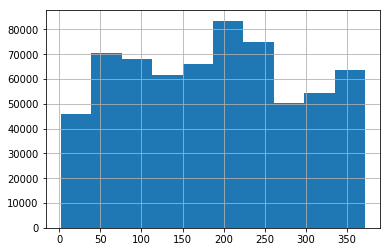

In [5]:
d=df_test['taxi_id'].hist().get_figure()
d.savefig('1.jpg')

In [6]:
df = df_test.values
print(df.shape)

(638167, 4)


In [7]:
romas = np.zeros(shape=(1000,20,4))
dfshape = 638167 - 20
for i in range(1000):
    k=np.random.randint(0, high=dfshape, size=None, dtype='l')
    for j in range(k, k+20):
        romas[i][j-k] = df[j]
        romas[i][j-k][0] = i
        romas[i][j-k][1] = j-k
        # if df[j+1][0]!=df[j][0]:

print(romas)


[[[  0.           0.          41.90485141  12.4834031 ]
  [  0.           1.          41.90497925  12.48309677]
  [  0.           2.          41.90509498  12.48273211]
  ...
  [  0.          17.          41.90447185  12.47866265]
  [  0.          18.          41.90425373  12.47808844]
  [  0.          19.          41.9041214   12.47778205]]

 [[  1.           0.          41.88454371  12.48926195]
  [  1.           1.          41.88492163  12.48943332]
  [  1.           2.          41.88593178  12.48962965]
  ...
  [  1.          17.          41.89032182  12.49413452]
  [  1.          18.          41.89050037  12.4942782 ]
  [  1.          19.          41.8905835   12.49457133]]

 [[  2.           0.          41.83924414  12.46213661]
  [  2.           1.          41.83986816  12.46296067]
  [  2.           2.          41.84071536  12.46431412]
  ...
  [  2.          17.          41.85040644  12.47529196]
  [  2.          18.          41.85098317  12.47565174]
  [  2.          19.      